# Results

In [14]:
# Import CSV from 
# results/grayscale_sun/per_image_metrics.csv
# results/canny_sun/per_image_metrics.csv
# results/LoG_sun/per_image_metrics.csv
# results/random_sun/per_image_metrics.csv

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
def load_csv(file_path):
    """
    Load CSV file and return DataFrame.
    """
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df
    else:
        print(f"File {file_path} does not exist.")
        return None
    
    # metric,mean,std
def plot_metrics(df, title):
    """
    Plot metrics from DataFrame.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x='metric', y='mean', data=df, yerr=df['std'], capsize=.2)
    plt.title(title)
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [20]:
# import the 4 csv files
experiment_name = 'sun'
grayscale_df = load_csv('../results/grayscale_{}/per_image_metrics.csv'.format(experiment_name))
canny_df = load_csv('../results/canny_{}/per_image_metrics.csv'.format(experiment_name))
log_df = load_csv('../results/DoG_{}/per_image_metrics.csv'.format(experiment_name))
random_df = load_csv('../results/random_{}/per_image_metrics.csv'.format(experiment_name))

# Combine the dataframes
combined_df = pd.concat([grayscale_df, canny_df, log_df, random_df], keys=['Grayscale', 'Canny', 'DoG', 'Random'])
# Reset index
combined_df.reset_index(level=0, inplace=True)
combined_df.rename(columns={'level_0': 'Method'}, inplace=True)

In [21]:
def calculate_mean_sem(df):
    """
    Calculate mean and standard error of the mean (sem) for each metric.
    """
    metrics = ['mse', 'ssim', 'vgg_perceptual', 'lpips', 'infer_time_s']
    results = []
    
    for metric in metrics:
        mean = df[metric].mean()
        sem = df[metric].std() / np.sqrt(len(df))
        results.append({'metric': metric, 'mean': mean, 'sem': sem})
    
    return pd.DataFrame(results)

# Calculate mean and sem for each method
grayscale_metrics = calculate_mean_sem(grayscale_df)
canny_metrics = calculate_mean_sem(canny_df)
log_metrics = calculate_mean_sem(log_df)
random_metrics = calculate_mean_sem(random_df)
# Combine the metrics into a single DataFrame
combined_metrics = pd.concat([grayscale_metrics, canny_metrics, log_metrics, random_metrics], keys=['Grayscale', 'Canny', 'DoG', 'Random'])
# give a column name for the method
combined_metrics.reset_index(level=0, inplace=True)
combined_metrics.rename(columns={'level_0': 'method'}, inplace=True)


/scratch-local/61329/ipykernel_2110104/383238165.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dfm['method'], rotation=45, ha='right')


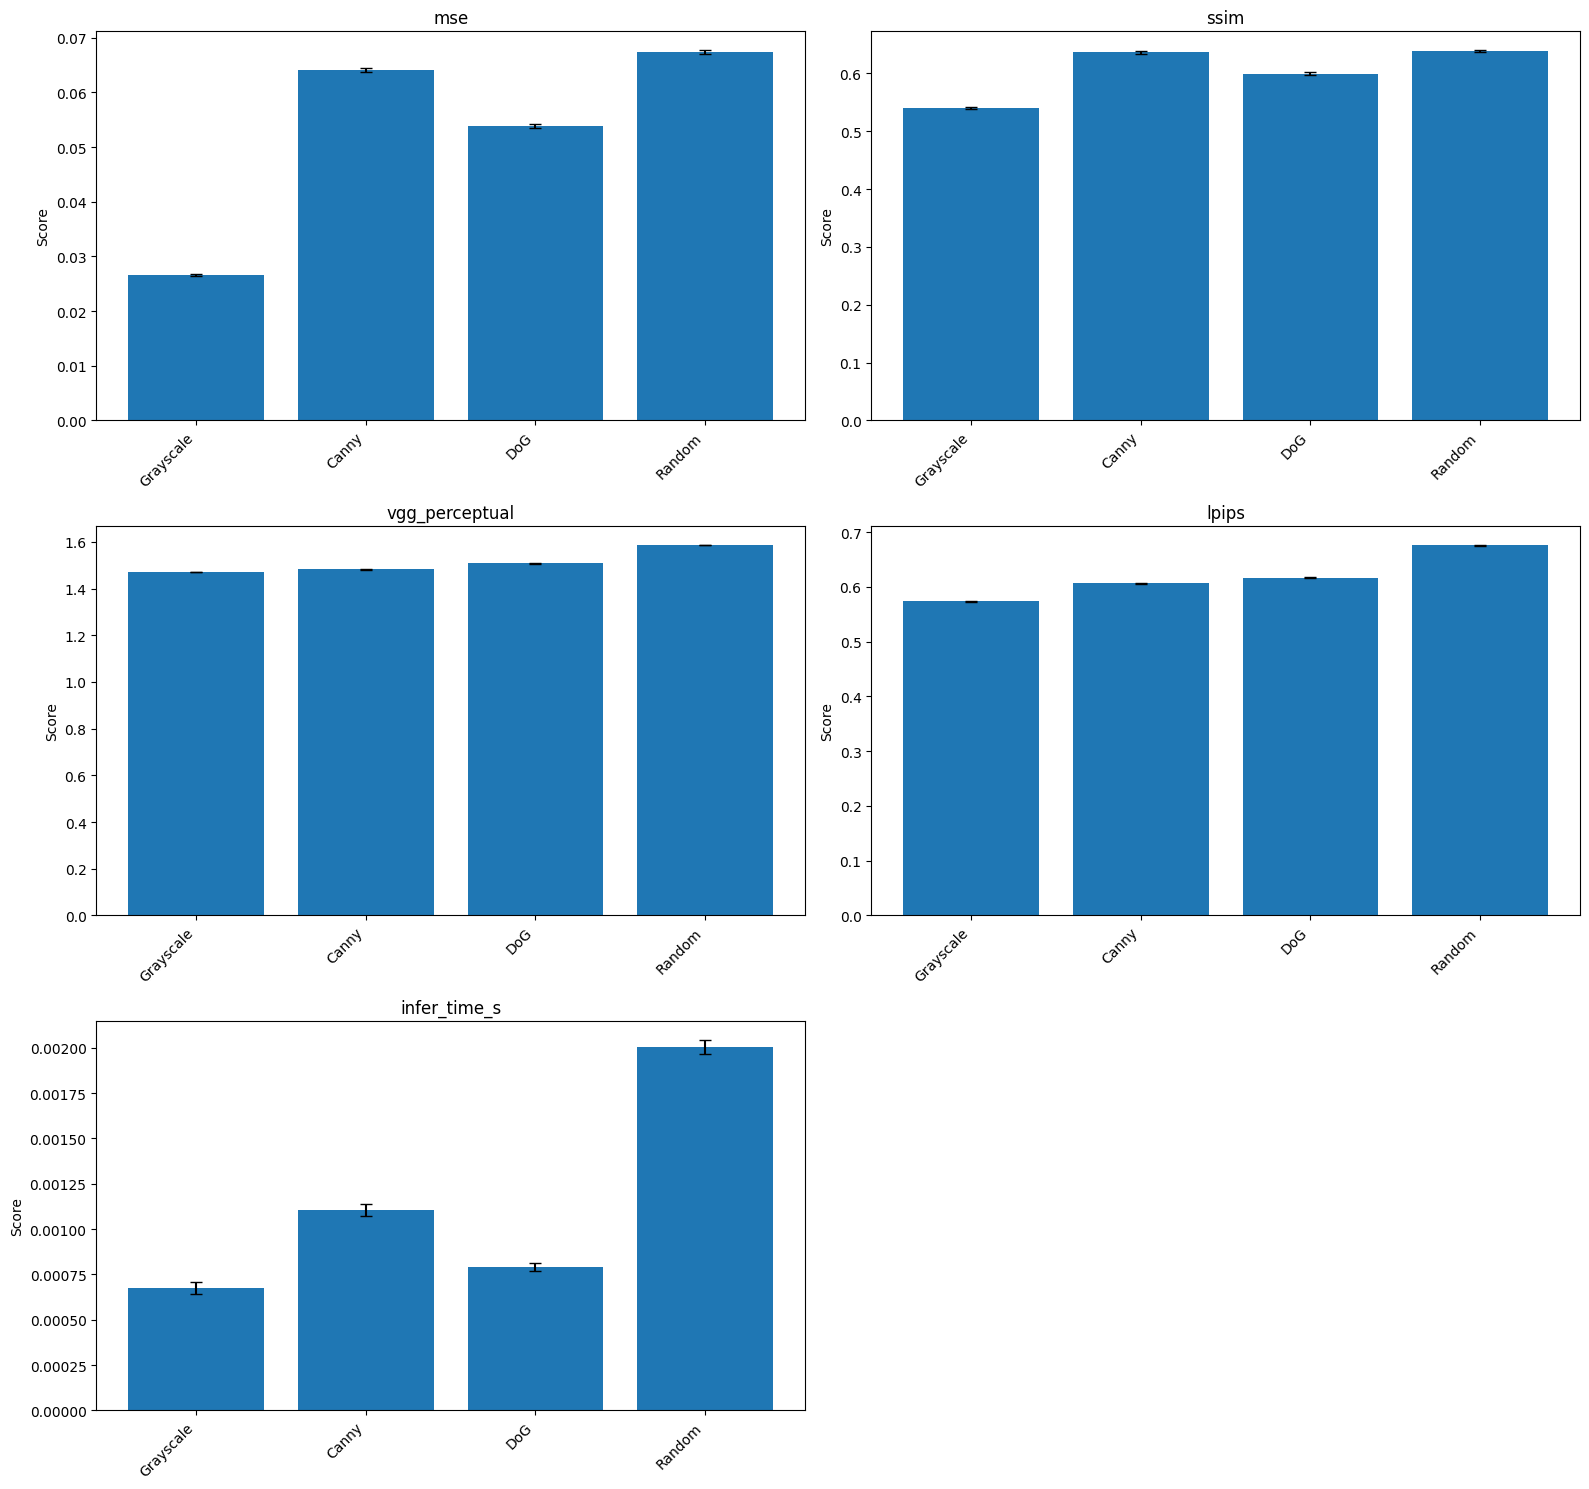

In [22]:
metrics = combined_metrics['metric'].unique()
n = len(metrics)
cols = 2
rows = (n + 1)//cols

fig, axes = plt.subplots(rows, cols, figsize=(8*cols, 5*rows))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    dfm = combined_metrics[combined_metrics['metric'] == metric]
    ax.bar(dfm['method'], dfm['mean'], 
           yerr=dfm['sem'], 
           capsize=4)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xticklabels(dfm['method'], rotation=45, ha='right')
    
# hide any unused axes
for ax in axes[len(metrics):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
